In [44]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
from dotmap import DotMap

from verifai.samplers.scenic_sampler import ScenicSampler
from verifai.scenic_server import ScenicServer
from verifai.falsifier import generic_falsifier, generic_parallel_falsifier
from verifai.monitor import multi_objective_monitor
from verifai.falsifier import generic_falsifier
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
# The specification must assume multi_objective_monitor class
class confidence_spec(multi_objective_monitor):
    def __init__(self):
        def specification(traj):
            min_dist = np.inf
            for i, val in enumerate(traj):
                obj1, obj2 = val
                min_dist = min(min_dist, obj1.distanceTo(obj2))
            for i, val in enumerate(traj[1:]):
                obj1, _ = val
                obj1_prev, _ = traj[i - 1]
                heading = obj1_prev - obj1
                print(f'heading = {heading}')
            # print(min_dist)
            return (-np.cos(3*(min_dist - 5)), min_dist - 5)
        priority_graph = nx.DiGraph()
        priority_graph.add_edge(0, 1)
        
        super().__init__(specification, priority_graph)

In [51]:
def test_driving_dynamic():

    path = 'scenic_driving.scenic'
    sampler = ScenicSampler.fromScenario(path)
    falsifier_params = DotMap(
        n_iters=100,
        save_error_table=True,
        save_safe_table=True,
    )
    server_options = DotMap(maxSteps=2, verbosity=0)
    monitor = confidence_spec()
    
    falsifier = generic_falsifier(sampler=sampler,
                                  falsifier_params=falsifier_params,
                                  server_class=ScenicServer,
                                  server_options=server_options,
                                  monitor=monitor)
    t0 = time.time()
    falsifier.run_falsifier()
    t = time.time() - t0
    print(f'Generated {len(falsifier.samples)} samples in {t} seconds with 1 worker')
    print(f'Number of counterexamples: {len(falsifier.error_table.table)}')
    return falsifier

In [52]:
falsifier = test_driving_dynamic()

Initializing server
Running falsifier; server class is <class 'verifai.scenic_server.ScenicServer'>
heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.19]
 [0.09 0.09 0.09 0.09 0.09 0.09 0.19 0.09 0.09 0.09]]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[0.081 0.081 0.081 0.081 0.081 0.081 0.081 0.081 0.081 0.271]
 [0.081 0.081 0.081 0.081 0.081 0.081 0.271 0.081 0.081 0.081]]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[0.081 0.081 0.081 0.081 0.081 0.081 0.081 0.081 0.081 0.271]
 [0.081 0.081 0.081 0.081 0.081 0.081 0.271 0.081 0.081 0.081]]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[0.0729 0.0729 0.0729 0.0729 0.0729 0.0729 0.0729 0.0729 0.0729 0.3439]
 [0.0729 0.0729 0.0729 0.0729 0.0729 0.1729 0.2439 0.0729 0.0729 0.0729]]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[0.0729 0.0729 0.0729 0.0729 0.0729 0.0729 0.0729 0.0729 0.0729 0.3439]
 [0.0729 0.0729 0.0729 0.0729 0.0729 0.1729 0.2439 0.0729 0.0729 0.0729]]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[0.0

heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[3.38139191e-04 3.38139191e-04 3.38139191e-04 3.38139191e-04
  3.38139191e-04 3.38139191e-04 3.38139191e-04 3.38139191e-04
  3.38139191e-04 9.96956747e-01]
 [3.38139191e-04 3.38139191e-04 3.38139191e-04 3.38139191e-04
  3.38139191e-04 1.31735648e-03 3.25642379e-02 9.63751431e-01
  3.38139191e-04 3.38139191e-04]]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[2.73892745e-04 2.73892745e-04 2.73892745e-04 2.73892745e-04
  2.73892745e-04 2.73892745e-04 2.73892745e-04 2.73892745e-04
  2.73892745e-04 9.97534965e-01]
 [2.73892745e-04 2.73892745e-04 2.73892745e-04 2.73892745e-04
  2.73892745e-04 1.06705875e-03 2.63770327e-02 9.70638659e-01
  2.73892745e-04 2.73892745e-04]]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[2.73892745e-04 2.73892745e-04 2.73892745e-04 2.73892745e-04
  2.73892745e-04 2.73892745e-04 2.73892745e-04 2.73892745e-04
  2.73892745e-04 9.97534965e-01]
 [2.73892745e-04 2.73892745e-04 2.73892745e-04 2.73892745e-04
  2.73892745e-04 1.06705875e-03

heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[1.96627050e-05 1.96627050e-05 1.96627050e-05 1.96627050e-05
  1.96627050e-05 1.96627050e-05 1.96627050e-05 1.96627050e-05
  1.96627050e-05 9.99823036e-01]
 [1.96627050e-05 1.96627050e-05 1.96627050e-05 1.96627050e-05
  1.96627050e-05 7.66039329e-05 2.45037702e-01 7.54748055e-01
  1.96627050e-05 1.96627050e-05]]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[1.96627050e-05 1.96627050e-05 1.96627050e-05 1.96627050e-05
  1.96627050e-05 1.96627050e-05 1.96627050e-05 1.96627050e-05
  1.96627050e-05 9.99823036e-01]
 [1.96627050e-05 1.96627050e-05 1.96627050e-05 1.96627050e-05
  1.96627050e-05 7.66039329e-05 2.45037702e-01 7.54748055e-01
  1.96627050e-05 1.96627050e-05]]
heading = (0.0 @ 0)
heading = (0.0 @ 0)
[[1.59267911e-05 1.59267911e-05 1.59267911e-05 1.59267911e-05
  1.59267911e-05 1.59267911e-05 1.59267911e-05 1.59267911e-05
  1.59267911e-05 9.99856659e-01]
 [1.59267911e-05 1.59267911e-05 1.59267911e-05 1.59267911e-05
  1.59267911e-05 6.20491856e-05

heading = (0.0 @ 0)
Generated 100 samples in 3.698188066482544 seconds with 1 worker
Number of counterexamples: 78


In [53]:
falsifier.error_table.table

,point.objects.object0.color[0],point.objects.object0.color[1],point.objects.object0.color[2],point.objects.object0.heading,point.objects.object0.position[0],point.objects.object0.position[1],point.objects.object0.velocity[0],point.objects.object0.velocity[1],point.objects.object1.color[0],point.objects.object1.color[1],point.objects.object1.color[2],point.objects.object1.heading,point.objects.object1.position[0],point.objects.object1.position[1],point.objects.object1.velocity[0],point.objects.object1.velocity[1],rho,rho_0
0,0.000000,0.000000,0.000000,1.928930,4.851530,2.0,-0.0,0.0,0.387069,0.284403,0.227633,-0.938553,3.345320,-2.0,0.0,0.0,-0.725813,0.570114
1,0.818219,0.809126,0.809126,1.928930,4.801971,2.0,-0.0,0.0,1.000000,1.000000,1.000000,-1.014559,4.326125,-2.0,0.0,0.0,-0.971796,0.974525
2,1.000000,1.000000,1.000000,1.928930,4.625155,2.0,-0.0,0.0,0.972210,0.972210,0.972210,2.270956,2.571876,-2.0,-0.0,0.0,-0.503785,-0.059407
3,0.401802,0.476466,0.783067,1.966933,4.422316,2.0,-0.0,0.0,0.691423,0.540960,0.540960,2.270956,2.686155,-2.0,-0.0,0.0,-0.639466,0.340645
4,0.330704,0.224656,0.224656,1.928930,4.627373,2.0,-0.0,0.0,0.368818,0.480649,0.239401,2.270956,2.822982,-2.0,-0.0,0.0,-0.611854,0.261683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.111146,0.111146,0.111146,1.928930,4.964310,2.0,-0.0,0.0,0.410924,0.406832,0.341832,2.315494,2.323752,-2.0,-0.0,0.0,-0.207032,-0.813242
74,0.721728,0.697859,0.644053,1.966933,4.431670,2.0,-0.0,0.0,0.943875,0.931977,0.926644,2.270956,2.439166,-2.0,-0.0,0.0,-0.531211,0.022836
75,0.065747,0.065747,0.065747,1.966933,4.322653,2.0,-0.0,0.0,0.981242,0.981242,0.981242,2.270956,2.405856,-2.0,-0.0,0.0,-0.564449,0.122244
76,0.747804,0.494185,0.289155,1.928930,4.812705,2.0,-0.0,0.0,0.503658,0.503658,0.503658,2.315494,2.015375,-2.0,-0.0,0.0,-0.118908,-0.937045


In [54]:
df = pd.concat([falsifier.safe_table.table, falsifier.error_table.table])

In [55]:
df

,point.objects.object0.color[0],point.objects.object0.color[1],point.objects.object0.color[2],point.objects.object0.heading,point.objects.object0.position[0],point.objects.object0.position[1],point.objects.object0.velocity[0],point.objects.object0.velocity[1],point.objects.object1.color[0],point.objects.object1.color[1],point.objects.object1.color[2],point.objects.object1.heading,point.objects.object1.position[0],point.objects.object1.position[1],point.objects.object1.velocity[0],point.objects.object1.velocity[1],rho,rho_0
0,0.882224,0.870996,0.641134,1.928930,4.704264,2.0,-0.0,0.0,0.425475,0.448817,0.303476,2.355751,1.374998,-2.0,-0.0,0.0,0.204230,-0.818104
1,0.226296,0.191687,0.187720,1.928930,4.560471,2.0,-0.0,0.0,0.448336,0.448336,0.448336,2.355751,1.442401,-2.0,-0.0,0.0,0.071721,-0.976941
2,0.836503,0.761467,0.707094,1.928930,4.601342,2.0,-0.0,0.0,0.898935,0.780087,0.774261,2.400384,0.856821,-2.0,-0.0,0.0,0.479182,-0.132856
3,0.321469,0.305208,0.293862,1.966933,4.398240,2.0,-0.0,0.0,1.000000,1.000000,1.000000,2.445017,0.256547,-2.0,-0.0,0.0,0.757918,0.646477
4,0.880165,0.860049,0.843156,1.928930,4.569111,2.0,-0.0,0.0,0.093891,0.093891,0.093891,2.400384,0.932597,-2.0,-0.0,0.0,0.405945,-0.345679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.111146,0.111146,0.111146,1.928930,4.964310,2.0,-0.0,0.0,0.410924,0.406832,0.341832,2.315494,2.323752,-2.0,-0.0,0.0,-0.207032,-0.813242
74,0.721728,0.697859,0.644053,1.966933,4.431670,2.0,-0.0,0.0,0.943875,0.931977,0.926644,2.270956,2.439166,-2.0,-0.0,0.0,-0.531211,0.022836
75,0.065747,0.065747,0.065747,1.966933,4.322653,2.0,-0.0,0.0,0.981242,0.981242,0.981242,2.270956,2.405856,-2.0,-0.0,0.0,-0.564449,0.122244
76,0.747804,0.494185,0.289155,1.928930,4.812705,2.0,-0.0,0.0,0.503658,0.503658,0.503658,2.315494,2.015375,-2.0,-0.0,0.0,-0.118908,-0.937045


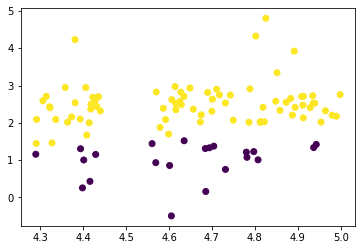

In [57]:
plt.scatter(df['point.objects.object0.position[0]'], df['point.objects.object1.position[0]'], c=df['rho'] < 0);